Exploratory Data Analysis

In [1]:
# Import packages
import random
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Load csv data
path = "C:\\Users\\samsr\\Desktop\\DATR-1023-master\\instacart_2017_05_01"
aisles = pd.read_csv(path + "\\aisle.csv")
departments = pd.read_csv(path + '\\departments.csv')
orders = pd.read_csv(path + '\\orders.csv')
products = pd.read_csv(path + '\\products.csv')
order_products_prior = pd.read_csv(path + '\\order_products_prior.csv')
order_products_train = pd.read_csv(path + '\\order_products_train.csv')

In [3]:
# The data is pre-divided into a "prior" and "train" set. We want to explore all the data together
# Concatenate the two order_products_* dataframes and drop the eval_set column from the orders dataframe
order_products = pd.concat([order_products_prior, order_products_train])
orders = orders.drop(columns = ['eval_set'])

What are the most popular products? Categories?
What gets ordered most? Reordered most?

In [4]:
# Merge the aisle and product descriptions with the order_products dataframe so all info is in one dataframe
order_products = order_products.merge(products, on="product_id").merge(aisles, on="aisle_id").merge(departments, on="department_id")

In [5]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


In [4]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [5]:
# Create a dataframe of the value counts of the product ID's to see which were the most frequently ordered
prodcounts = pd.DataFrame(order_products.product_id.value_counts())
prodcounts = prodcounts.reset_index()
prodcounts.columns = ['product_id','counts']

In [6]:
# Add the product names and department info to the prodcounts dataframe
prodcounts = prodcounts.merge(products, on = 'product_id')
prodcounts = prodcounts.merge(departments, on = 'department_id', how='inner')

In [7]:
# Check the top 10 most ordered items
prodcounts.sort_values(by="counts", ascending=False).head(10)

,product_id,counts,product_name,aisle_id,department_id,department
0,24852,491291,Banana,24,4,produce
1,13176,394930,Bag of Organic Bananas,24,4,produce
2,21137,275577,Organic Strawberries,24,4,produce
3,21903,251705,Organic Baby Spinach,123,4,produce
4,47209,220877,Organic Hass Avocado,24,4,produce
5,47766,184224,Organic Avocado,24,4,produce
6,47626,160792,Large Lemon,24,4,produce
7,16797,149445,Strawberries,24,4,produce
8,26209,146660,Limes,24,4,produce
1684,27845,142813,Organic Whole Milk,84,16,dairy eggs


The top 9 most frequently ordered products are produce items. I am interested to know which is the most ordered item in each department

In [8]:
# Show the product with the max count for each department
best_of_depts = prodcounts.loc[prodcounts.groupby("department_id").counts.idxmax()]
best_of_depts = best_of_depts[['department_id','department','product_id','product_name','counts','aisle_id']]
best_of_depts

,department_id,department,product_id,product_name,counts,aisle_id
12335,1,frozen,9076,Blueberries,58269,116
48165,2,other,38662,Roasted Almond Butter,4150,6
10819,3,bakery,5077,100% Whole Wheat Bread,63114,112
0,4,produce,24852,Banana,491291,24
40548,5,alcohol,2120,Sauvignon Blanc,8541,62
37032,6,international,36724,Organic Sea Salt Roasted Seaweed Snacks,10690,66
5133,7,beverages,44632,Sparkling Water Grapefruit,79245,115
48713,8,pets,7076,Grain Free Chicken Formula Cat Food,1893,41
35174,9,dry goods pasta,23375,Marinara Sauce,20752,9
38171,10,bulk,5161,Dried Mango,10596,18


How do the rankings change when we look at frequency of reorder rather than number of total orders?
We need to look at the proportion of reorders to total orders for each product.

In [9]:
# Select the entries in the order_products dataframe with reorder = 1, group by product ids, sum the total number of reorders per product, and show us the top ten most reordered
reordersums = order_products[order_products.reordered==1].groupby('product_id').reordered.sum().reset_index().sort_values(by= 'reordered', ascending=False)

In [10]:
# Add the counts of reordered to the prodcounts dataframe
prodcounts = prodcounts.merge(reordersums, on = 'product_id')

In [11]:
# Add a caclulated column to see the proportion of reorders to total orders
prodcounts['reorder_ratio'] = prodcounts['reordered']/prodcounts['counts']

In [12]:
# Check which products have the highest reorder ratio
prodcounts.sort_values(by='reorder_ratio',ascending= False).head(10)

,product_id,counts,product_name,aisle_id,department_id,department,reordered,reorder_ratio
9925,6433,69,Raw Veggie Wrappers,13,20,deli,65,0.942029
39836,2075,90,Serenity Ultimate Extrema Overnight Pads,126,11,personal care,84,0.933333
8666,43553,13,Orange Energy Shots,64,7,beverages,12,0.923077
29773,27740,102,Chocolate Love Bar,45,19,snacks,94,0.921569
37432,14609,35,Soy Powder Infant Formula,92,18,babies,32,0.914286
44378,13875,45,Simply Sleep Nighttime Sleep Aid,6,2,other,41,0.911111
8264,39992,22,"Energy Shot, Grape Flavor",64,7,beverages,20,0.909091
38262,5868,30,Russian River Valley Reserve Pinot Noir,28,5,alcohol,27,0.900000
18957,36543,69,Bars Peanut Butter,88,13,pantry,62,0.898551
30316,26093,67,Soy Crisps Lightly Salted,107,19,snacks,60,0.895522


And what is the most reordered product in each department?

In [13]:
reordered_depts = prodcounts.loc[prodcounts.groupby("department_id").reorder_ratio.idxmax()]
reordered_depts = reordered_depts[['department_id','department','product_id','product_name','reorder_ratio','reordered','counts','aisle_id']]
reordered_depts

,department_id,department,product_id,product_name,reorder_ratio,reordered,counts,aisle_id
14901,1,frozen,25766,Steamfresh Garlic Parm Peas,0.875000,28,32,116
44378,2,other,13875,Simply Sleep Nighttime Sleep Aid,0.911111,41,45,6
10666,3,bakery,1157,Wheat Sandwich Bread,0.828140,877,1059,112
0,4,produce,24852,Banana,0.845051,415166,491291,24
38262,5,alcohol,5868,Russian River Valley Reserve Pinot Noir,0.900000,27,30,28
35394,6,international,43746,Chocolate Brownie Mochi,0.846154,22,26,66
8666,7,beverages,43553,Orange Energy Shots,0.923077,12,13,64
44890,8,pets,10236,Fragrance Free Clay with Natural Odor Eliminat...,0.870229,114,131,41
34140,9,dry goods pasta,26198,Chicken & Noodles Compleats,0.837838,31,37,4
35697,10,bulk,5161,Dried Mango,0.745847,7903,10596,18


Who are the most active users and what are their ordering habits?

In [14]:
# Check the largest value of "order_number" in the orders dataframe
orders.order_number.max()

100

In [15]:
# How many users have this many orders?
len(orders[orders.order_number == 100])


1374

Since the order numbers don't go past 100, and there are 1374 users with exactly 100 orders, it seems like the data were cut off somehow

In [16]:
# Create a dataframe containing just the entries from our 1374 top users
topusers = orders[orders.order_number == 100].user_id
topusersdf = orders.loc[orders['user_id'].isin(list(topusers))]
topusersdf.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,1.374000e+05,137400.000000,137400.000000,137400.000000,137400.000000,136026.000000
mean,1.713212e+06,101827.940320,50.500000,2.883974,13.035990,2.846838
std,9.869674e+05,60550.813326,28.866175,1.887802,4.233186,2.537197
min,1.500000e+01,210.000000,1.000000,0.000000,0.000000,0.000000
25%,8.587795e+05,49210.000000,25.750000,1.000000,10.000000,1.000000
50%,1.717386e+06,100229.000000,50.500000,3.000000,13.000000,2.000000
75%,2.565699e+06,154378.000000,75.250000,4.000000,16.000000,4.000000
max,3.421069e+06,206105.000000,100.000000,6.000000,23.000000,30.000000


In [17]:
# Show orders of all users for comparison to top users
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


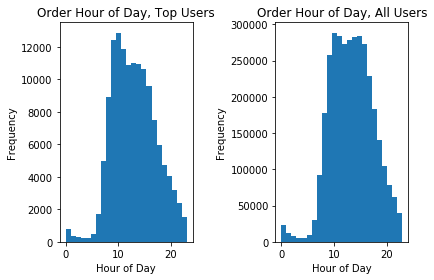

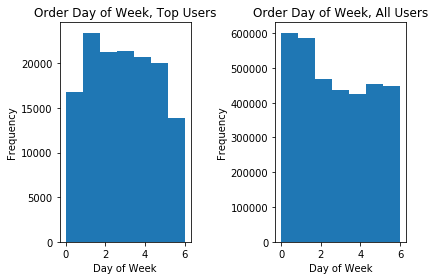

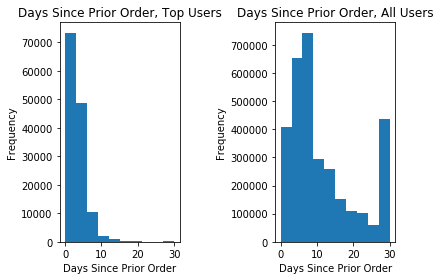

In [18]:
# Some histograms to see if there are any obvious differences between top users and all users
plt.subplot(1, 2, 1)
plt.title("Order Hour of Day, Top Users")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.hist(topusersdf.order_hour_of_day, bins=24)

plt.subplot(1, 2, 2)
plt.title("Order Hour of Day, All Users")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.hist(orders.order_hour_of_day, bins=24)

plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.title("Order Day of Week, Top Users")
plt.xlabel("Day of Week")
plt.ylabel("Frequency")
plt.hist(topusersdf.order_dow, bins=7)

plt.subplot(1, 2, 2)
plt.title("Order Day of Week, All Users")
plt.xlabel("Day of Week")
plt.ylabel("Frequency")
plt.hist(orders.order_dow, bins=7)

plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.title("Days Since Prior Order, Top Users")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Frequency")
plt.hist(topusersdf.days_since_prior_order.dropna(), bins=10)

plt.subplot(1, 2, 2)
plt.title("Days Since Prior Order, All Users")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Frequency")
plt.hist(orders.days_since_prior_order.dropna(), bins=10)

plt.tight_layout()
plt.show()



Let's examine other user ordering habits

In [19]:
# Create a dataframe that shows the cart size (max value of add to cart order) for each order number
cartsize = pd.DataFrame(order_products.groupby('order_id').add_to_cart_order.max()).reset_index()
cartsize.columns = ['order_id', 'cart_size']
orders=orders.merge(cartsize, on = "order_id")

In [20]:
# Create a users df and populate it with averaged user habits
# Find the average days between orders for each user
avg_days_between = orders.groupby('user_id').days_since_prior_order.mean().reset_index()
avg_days_between.columns = ['user_id', 'avg_days_between']

# Find the total number of orders for each user
total_orders = orders.groupby('user_id').order_number.max().reset_index()
total_orders.columns=['user_id', 'total_orders']

# Find the average day of week and hour of day for each user
dow = orders.groupby('user_id').order_dow.mean().reset_index()
dow.columns=['user_id', 'avg_dow']

hod = orders.groupby('user_id').order_hour_of_day.mean().reset_index()
hod.columns=['user_id', 'avg_hod']

# Find the average cart size for each user
cart_size = orders.groupby('user_id').cart_size.mean().reset_index()
cart_size.columns = ['user_id', 'avg_cartsize']


users = avg_days_between.merge(total_orders, on='user_id').merge(dow, on='user_id').merge(hod, on="user_id").merge(cart_size, on= 'user_id')
users.head()

,user_id,avg_days_between,total_orders,avg_dow,avg_hod,avg_cartsize
0,1,19.000000,11,2.636364,10.090909,6.363636
1,2,16.285714,15,2.066667,10.600000,15.066667
2,3,12.090909,12,1.083333,16.416667,7.333333
3,4,13.750000,5,4.800000,12.600000,3.600000
4,5,11.500000,5,1.400000,15.000000,9.200000


In [21]:
users.describe()

,user_id,avg_days_between,total_orders,avg_dow,avg_hod,avg_cartsize
count,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,15.360842,16.226658,2.753496,13.585541,9.984527
std,59527.555167,6.985487,16.662238,0.910261,2.052628,5.840846
min,1.000000,0.000000,3.000000,0.000000,0.750000,1.000000
25%,51553.000000,9.666667,6.000000,2.200000,12.250000,5.777778
50%,103105.000000,14.800000,10.000000,2.760870,13.571429,9.000000
75%,154657.000000,20.500000,20.000000,3.300000,14.923077,13.000000
max,206209.000000,30.000000,100.000000,6.000000,23.000000,60.500000


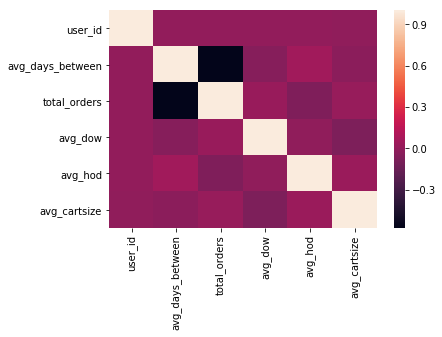

In [22]:
sns.heatmap(users.corr())

Total orders is slightly correlated with avg days between orders. Indicating that fewer days between orders correlates to more orders overall

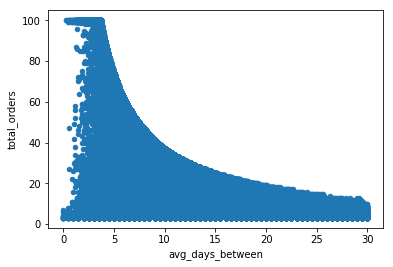

In [23]:
users.plot(kind='scatter', x= 'avg_days_between', y= 'total_orders')

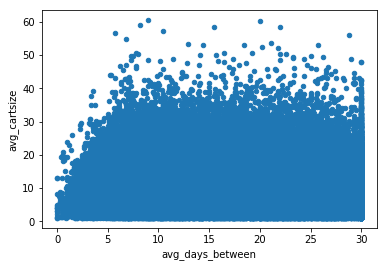

In [24]:
users.plot(kind='scatter', x = 'avg_days_between', y= 'avg_cartsize')

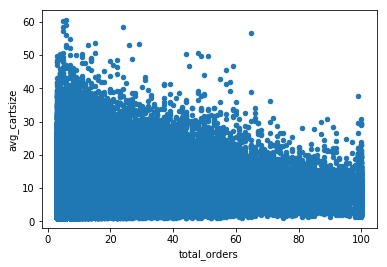

In [25]:
users.plot(kind='scatter', x= 'total_orders', y= 'avg_cartsize')

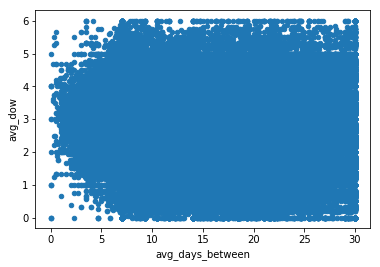

In [26]:
users.plot(kind='scatter', x= 'avg_days_between', y= 'avg_dow')

In [27]:
orders.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,cart_size
order_id,1.000000,-0.000194,-0.000056,0.000920,0.000016,0.000660,0.000007
user_id,-0.000194,1.000000,-0.001512,-0.001277,-0.000947,0.001476,-0.000751
order_number,-0.000056,-0.001512,1.000000,0.015157,-0.035910,-0.360495,-0.002118
order_dow,0.000920,-0.001277,0.015157,1.000000,0.006082,-0.028409,-0.025404
order_hour_of_day,0.000016,-0.000947,-0.035910,0.006082,1.000000,0.000863,-0.005596
days_since_prior_order,0.000660,0.001476,-0.360495,-0.028409,0.000863,1.000000,0.057544
cart_size,0.000007,-0.000751,-0.002118,-0.025404,-0.005596,0.057544,1.000000


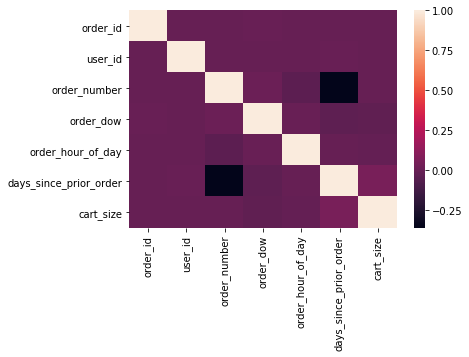

In [28]:
sns.heatmap(orders.corr())

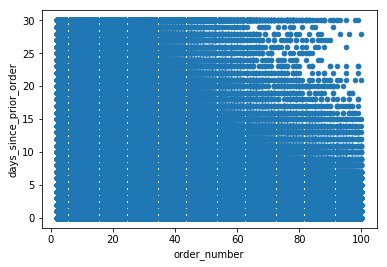

In [30]:
orders.plot(kind='scatter', x= 'order_number', y= 'days_since_prior_order')

There are no real meaningful correlations in the orders dataframe

In [79]:
#prodcounts.to_csv(path + "\\prodcounts.csv")
#orders.to_csv(path + "\\orders_new.csv")
#order_products.to_csv(path + "\\order_products_new.csv")